In [9]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def myfunc(x):
    
    # Tasks 1,2
    #f = 2*x
    #g = 2
    #p = np.cos(3*x)

    # Task 3
    #f = x
    #g = 1
    #p = 5*x

    # Task 4
    # nuclear rod
    K = 16.75
    R = 0.015
    f = 1 / x
    g = 0
    p = -10**8*np.exp(-x/R)/(x*K)
    
    return (f,g,p)

In [10]:
# Task A
def MyGauss(A,b):
    
    # number of equations
    n = len(b)
    
    # eliminate the unknowns, from first to (n-1)th unknown, to form an upper triangular matrix
    for i in range(0,n-1):
        # eliminate the i-th unknown from the (i+1)th row downwards
        # i.e. set the zeros in column i.
        for j in range(i+1,n):
            # eliminate on row j

            # A(i,i) is the pivot coefficient
            p = A[j,i] / A[i,i]
        
            # compute the new elements of row j in matrix A
            # use slicing
            #A[j,:] = A[j,:] - p * A[i,:]
            # or, alternatively, loop for every cell of row j
            #for k in range(i,n):
            #    A[j,k] = A[j,k] - p * A[i,k]
            A[j,:] = A[j,:] - p * A[i,:]

            # compute the new element of row j in vector b
            b[j] = b[j] - p * b[i]
    
    # evauate, by back substitution the solution
    # start from the last unknown and go upward till the first unknown
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        # contribution from b (right hand side of the equation)
        x[i] = b[i] / A[i,i]
        # contribution from the other (already evaluated) unknowns
        # (within the left hand side of the equation)
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]

    return x



In [11]:
def myodebc(a,b,ya,yb,N):


    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]


    # build a set of algebraic equation A * y = b
    # where A is N+1 by N+1
    A = np.zeros((N+1,N+1))
    b = np.zeros(N+1)
    # set the boundary conditions
    A[0,0] = 1
    b[0] = ya
    A[N,N] = 1
    b[N] = yb
    # set equations for the interior points
    for i in range(1,N):
       # evaluate the functions f, g and p at this x
       (f, g, p) = myfunc(x[i])
       A[i,i-1] = 1/h**2 - f / (2*h)
       A[i,i] = g - 2 / h**2
       A[i,i+1] = 1/h**2 + f / (2*h)
       b[i] = p

    y = MyGauss(A,b)

    return (x,y)


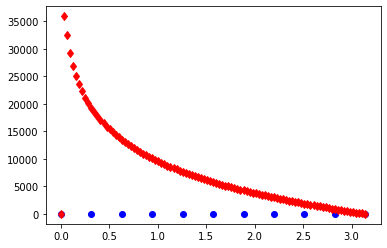

In [12]:
# Task 1
(x,y) = myodebc(0,np.pi,1.5,0,10)
pl.plot(x,y,'bo')
(x,y) = myodebc(0,np.pi,1.5,0,100)
pl.plot(x,y,'rd')


In [13]:
def Jacobi(a,b,ya,yb,N,tol):
    
    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]

    y = np.zeros(N+1)
    yk = np.zeros(N+1)
    
    c = 0
    err = 10.0 * tol
    while err > tol and c<100000:
    
        # enforce bc
        y[0] = ya
        y[N] = yb
        # evaluate internal points for next iteration
        for i in range(1,N):
            # solve for this x
            # evaluate the functions f, g and p at this x
            (f, g, p) = myfunc(x[i])
            y[i] = ( -(yk[i+1]+yk[i-1])/h**2 - f*(yk[i+1]-yk[i-1])/(2*h) + p ) / (g-2/h**2)

        err = np.max(np.abs(y - yk))
        yk = np.copy(y)


    return (x,y)


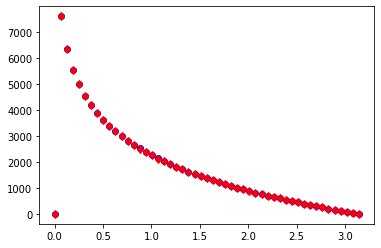

In [14]:
# Task 2
(x,y) = myodebc(0,np.pi,1.5,0,50)
pl.plot(x,y,'bo')
(x,y) = Jacobi(0,np.pi,1.5,0,50, 0.01)
pl.plot(x,y,'rd')

In [21]:
def myodebc2(a,b,bca,bcb,N,c):

    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]


    # build a set of algebraic equation A * y = b
    # where A is N+1 by N+1
    A = np.zeros((N+1,N+1))
    b = np.zeros(N+1)
    # set the boundary conditions
    # boundary a: we need the forward scheme
    A[0,0] = c[1] - c[0]/h
    A[0,1] = c[0]/h
    b[0] = bca
    
    # boundary b: we need the backward scheme
    A[N,N-1] = -c[2]/h
    A[N,N] = c[2]/h + c[3]
    b[N] = bcb

    # set equations for the interior points
    for i in range(1,N):
       # evaluate the functions f, g and p at this x
       (f, g, p) = myfunc(x[i])
       A[i,i-1] = 1/h**2 - f / (2*h)
       A[i,i] = g - 2 / h**2
       A[i,i+1] = 1/h**2 + f / (2*h)
       b[i] = p
        

    



    y = np.linalg.inv(A).dot(b)

    return (x,y)


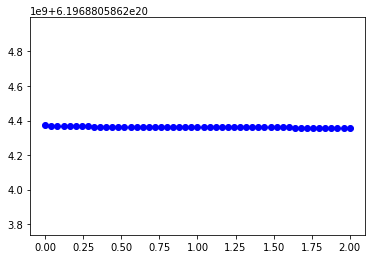

In [22]:
# Task 3
(x,y) = myodebc2(0,2,0,-1,50,[1,0,1,0])
pl.plot(x,y,'bo')

0.015 0.018 -37731.34328358209 1694328.3582089553 50 [1.00000000e+00 0.00000000e+00 1.00000000e+00 3.58208955e+03]


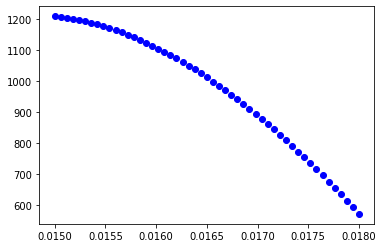

In [24]:
# Task 4
# Nuclear rod

h = 6*10**4
K = 16.75
R = 0.015
w = 0.003
Tw = 473
#Tw = 490
# 1
# set the b.c.
c = np.zeros(4)
# at boundary a
c[0] = 1
c[1] = 0
bca = -6.32*10**5 / K
# at boundary b
c[2] = 1
c[3] = h / K #???????
bcb = h / K * Tw

(x,y) = myodebc2(R,R+w,bca,bcb,50,c)
pl.plot(x,y,'bo')


print(R,R+w,bca,bcb,50,c)

## Different Boundary Conditions


In [1]:
"""for boundary conditions with derivatives employ forward and backward scheme
at a and b respectively"""
## Modify myodebc to acommodate different boundary conditions


def myfunc(x):
    q = 5
    return (x,1,q*x)


def Modifiedmyodebc(a,b,ya,yb,N,c):
    
    
    # generate xgrid
    x = np.linspace(a,b,N+1)
    h = (b-a)/N
    
    #generate matrix to fill
    matrice = np.zeros((N+1,N+1))
    matrice[0][0] = 1
    matrice[N][N] = 1
    
    # generate list of constants
    alist = np.zeros((N+1,1))
    blist = np.zeros((N+1,1))
    clist = np.zeros((N+1,1))
    

    # generate right hand side
    plist = np.zeros((N+1,1)) # this hold all y values y0,y1,y2...yn
    
    #impose boundaries
    plist[0] = ya
    matrice[0][0] = c[1]- c[0]/h
    matrice[0][1] = c[0]/h
    
    plist[N] = yb
    matrice[N][N] = c[3] + c[2]/h
    matrice[N][N-1] = -c[2]/h
    
    for i in range (1,N):
        #get the values for the x functions
        f,g,p = myfunc(x[i])
        plist[i] = [p]
        
        #get values for the constants
        alist[i] = [1/(h**2) - f/2/h]
        blist[i] = [g-2/(h**2)]
        clist[i] = [1/(h**2) + f/2/h]
    
    for i in range(1,N):
        #add constants to matrix
        matrice[i][i-1] = alist[i]
        matrice[i][i]   = blist[i]
        matrice[i][i+1] = clist[i]
        
    #pass on to Gauss Solver
    
#     for row in matrice:
#         print(row)
    

    
    #result = MyGauss(matrice,plist)
    result = np.linalg.inv(matrice).dot(plist)
    return(result,x)
    
    
####    
a = 0
b = 2
ya = 0
yb = -1
N = 50
# c0 = c2 = 0 : dirichlet ----- c1 = c3= 0: neumeann
c = [1,0,1,0]

y,x = Modifiedmyodebc(a,b,ya,yb,N,c)

pl.plot(x,y)
pl.title("{} intervals".format(N))

NameError: name 'np' is not defined